# HW01: ML Lib Intro (библиотеки машинного обучения)

**Оформление ДЗ**:

- Выполненное ДЗ сохраните в файл ``ml_b2c2025q2_<фамилия>_<имя>_hw01.ipynb`` (пример ``ml_b2c2025q2_dral_alexey_hw01.ipynb``)
- Открыть форму сдачи ДЗ: [ML-B2C-2025-Q2](https://forms.gle/1cS6HPGgvdSzPfuc9)
- Выбрать задание: ``HW01: ML Lib Intro``
- Указать ваш логин на образовательной платформе (логин EDX)
- Загрузить файл с решением

**Дополнительные ссылки**
- Настройка локального окружения: https://github.com/big-data-team/ml-course
- Датасеты UCI: https://archive.ics.uci.edu/
- BDT Streamlit Demo обучения kNN: https://bdt-knn-demo.streamlit.app/

**Вопросы**:
- Свои вопросы присылайте в Телеграм.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

   https://forms.gle/GnuG1EpcgQd1wRdV7

### Вопросы на понимание

1. Перечислите какие задачи машинного обучения бывают (с точки зрения математики, а не области применения)
2. Напишите тезисно, своими словами для чего используется каждая из библиотек: numpy, matplotlib, pandas, seaborn, scipy, sklearn, streamlit
3. В чем смысл деления выборки на train и test?
4. Вы используете алгоритм классификации kNN с числом соседей k=2 для задачи классификации на 2 класса ("A" и "B"). Выберем произвольный объект, который однозначно классифицируется классом "A". Может ли этот объект классифицироваться классом "B", если мы увеличим число соседей до k=3? Ответ поясните.
5. Какой план действий, если возникает ошибка при исполнении кода?

<ваши ответы - здесь>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


### Часть 1. Разогрев (30%)

In [305]:
import re 

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [10]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: rng.integers
rng = np.random.default_rng(seed=42)
A = rng.integers(low=1, high=100, size=(10,10))

In [ ]:
# Посчитайте средние значения в матрице по столбцам
A.mean(axis=0)

In [25]:
# Транспонируйте матрицу A
A.T

array([[ 9, 53, 50, 45, 17, 76, 92, 79, 94, 44],
       [77, 97, 37, 23, 76, 20, 74, 19, 44, 80],
       [65, 73, 19, 10, 70, 37, 37, 46, 16, 84],
       [44, 76, 92, 55, 36, 47, 96, 13, 83, 39],
       [43, 72, 78, 88,  7, 50, 41, 68, 63, 89],
       [86, 78, 64,  7, 97,  5, 33, 48, 70, 29],
       [ 9, 51, 40, 85, 45, 55, 90, 33, 10, 24],
       [70, 13, 82, 82, 89, 16, 37, 23, 31, 68],
       [20, 84, 54, 28, 68, 74,  8, 56, 77, 64],
       [10, 45, 44, 63, 78, 68, 47, 67, 83, 14]])

In [26]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A
A * A.T

array([[  81, 4081, 3250, 1980,  731, 6536,  828, 5530, 1880,  440],
       [4081, 9409, 2701, 1748, 5472, 1560, 3774,  247, 3696, 3600],
       [3250, 2701,  361,  920, 5460, 2368, 1480, 3772,  864, 3696],
       [1980, 1748,  920, 3025, 3168,  329, 8160, 1066, 2324, 2457],
       [ 731, 5472, 5460, 3168,   49, 4850, 1845, 6052, 4284, 6942],
       [6536, 1560, 2368,  329, 4850,   25, 1815,  768, 5180, 1972],
       [ 828, 3774, 1480, 8160, 1845, 1815, 8100, 1221,   80, 1128],
       [5530,  247, 3772, 1066, 6052,  768, 1221,  529, 1736, 4556],
       [1880, 3696,  864, 2324, 4284, 5180,   80, 1736, 5929, 5312],
       [ 440, 3600, 3696, 2457, 6942, 1972, 1128, 4556, 5312,  196]])

In [28]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product
B = np.dot(A,A)

In [109]:
# Отлично! Сгенерируйте вектор v из 20 идущих подряд целых чисел начиная с 1
v = np.arange(1, 21)

In [110]:
# Перемешайте его случайным образом
# hint: np.random.shuffle
# Warning! Прочитайте документацию этой функции
np.random.shuffle(v)

In [111]:
# Проверим Вас
assert(v is not None)

In [112]:
# Выведите максимум вектора v
v.max()

20

In [113]:
# Сохраните индекс максимального элемента вектора v в переменную max_ind
max_ind = v.argmax()

In [114]:
# Проверим Вас
assert(v[max_ind] == v.max())

In [115]:
# Отсортируйте v по убыванию
v_sorted = -np.sort(-v)

In [116]:
assert(np.array_equal(v_sorted, np.arange(20, 0, -1)))

Отлично. Не забывайте про функции np.percentile, np.mean, np.median etc.

И не забывайте читать документацию.

### Часть 2. Визуализация и оптимизация (40%)

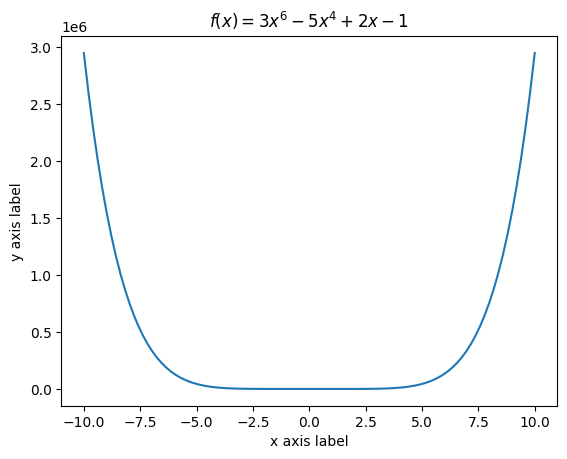

In [120]:
import matplotlib.pyplot as plt
# Нарисуйте график функции f(x) = 3 * x^6 - 5 * x^4 + 2 * x - 1
# Используйте TeX-нотацию для того, чтобы подписать график функции
x = np.linspace(-10, 10, 100)
y = 3 * x**6 - 5 * x**4 + 2 * x - 1

plt.plot(x, y)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('$f(x) = 3x^6 - 5x^4 + 2x - 1$')
plt.show()

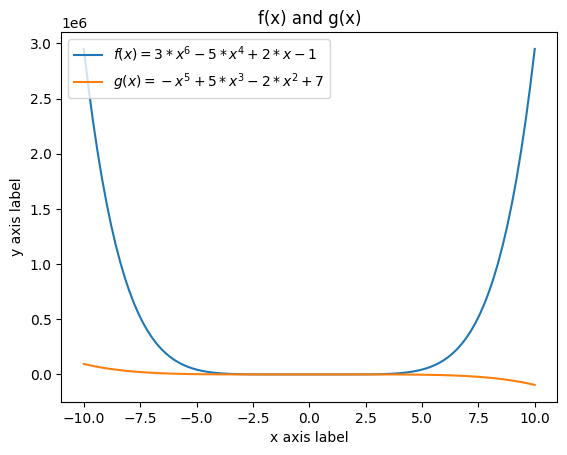

In [129]:
# Отобразите 2 функции на одном графике
# 1. f(x) = 3 * x^6 - 5 * x^4 + 2 * x - 1
# 2. g(x) = - x^5 + 5 * x^3 - 2 * x^2 + 7
# Используйте TeX-нотацию для того, чтобы подписать график функции
x = np.linspace(-10, 10, 100)
y1 = 3 * x**6 - 5 * x**4 + 2 * x - 1
y2 = - x**5 + 5 * x**3 - 2 * x**2 + 7

plt.plot(x, y1, )
plt.plot(x, y2,)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('f(x) and g(x)')

plt.legend(['$f(x) = 3 * x^6 - 5 * x^4 + 2 * x - 1$', 
            '$g(x) = - x^5 + 5 * x^3 - 2 * x^2 + 7$'],loc='upper left')
plt.show()

Локальный минимум f(x): x = -1.0936, значение = -5.2070
Локальный минимум g(x): x = -1.8525, значение = -9.8334


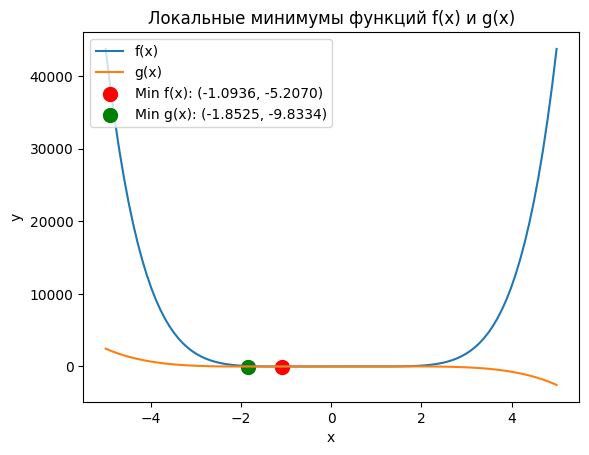

In [141]:
# Найдите 1 локальный минимум для каждой функции с помощью scipy
from scipy.optimize import minimize

def f(x):
    return 3 * x**6 - 5 * x**4 + 2 * x - 1

def g(x):
    return -x**5 + 5 * x**3 - 2 * x**2 + 7

result_f = minimize(f, x0=0.5)  
min_point_f = result_f.x[0]
min_value_f = result_f.fun

result_g = minimize(g, x0=1.0)  
min_point_g = result_g.x[0]
min_value_g = result_g.fun

print(f"Локальный минимум f(x): x = {min_point_f:.4f}, значение = {min_value_f:.4f}")
print(f"Локальный минимум g(x): x = {min_point_g:.4f}, значение = {min_value_g:.4f}")

x = np.linspace(-5, 5, 100) 
y1 = f(x)
y2 = g(x)

plt.plot(x, y1, label='f(x)')
plt.plot(x, y2, label='g(x)')
plt.scatter(min_point_f, min_value_f, color='red', s=100, marker='o', label=f'Min f(x): ({min_point_f:.4f}, {min_value_f:.4f})')
plt.scatter(min_point_g, min_value_g, color='green', s=100, marker='o', label=f'Min g(x): ({min_point_g:.4f}, {min_value_g:.4f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Локальные минимумы функций f(x) и g(x)')
plt.legend(loc='upper left')
plt.show()

In [147]:
# Найдите минимум функции от двух переменных f(x, y) = 3 * x * y + 3 * x^2 - 4 * y + 7 - 5 * x^5
def f(vars):
    x, y = vars
    return 3 * x * y + 3 * x**2 - 4 * y + 7 - 5 * x**5

initial_guess = [0, 0]
result = minimize(f, initial_guess, method='Nelder-Mead')
min_x, min_y = result.x
min_value = result.fun

print(f"Минимум функции находится в точке: x = {min_x:.1f}, y = {min_y:.1f}")
print(f"Значение функции в точке минимума: f(x,y) = {min_value:.6f}")

Минимум функции находится в точке: x = -1638710.9, y = 40487008284293596687892480.0
Значение функции в точке минимума: f(x,y) = -139954056328474040300065957871616.000000


/var/folders/l9/p8dmtkcx40g8jtfzctxzg4km0000gn/T/ipykernel_86971/821525765.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 60)` for the same effect.

  ax = sns.pointplot(


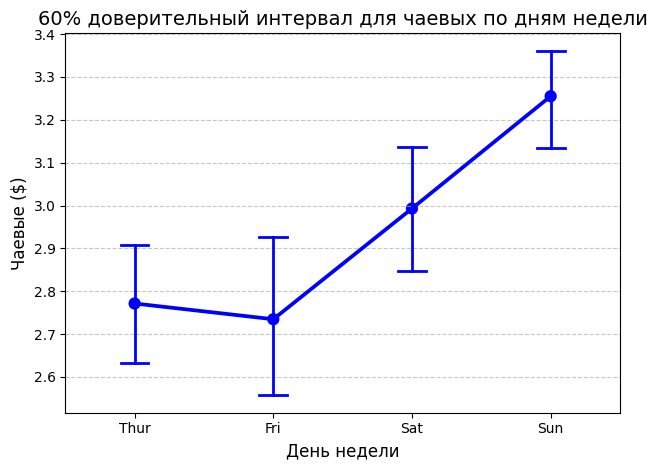

In [148]:
# Возьмите dataset "tips" из seaborn и отобразите 60%-доверительный интервал для параметра "tip"
# в зависимости от дня недели
import seaborn as sns
from scipy import stats

tips = sns.load_dataset("tips")
ax = sns.pointplot(
    x="day", 
    y="tip", 
    data=tips,
    ci=60, 
    capsize=0.2, 
    errwidth=2,   
    color="blue"
)

plt.title('60% доверительный интервал для чаевых по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Чаевые ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Часть 3. Обучение kNN для Titanic (30%)

In [ ]:
# Скачайте train и test выборку датасета Titanic (также доступно в материалах семинара)
# и прочитайте с помощью pandas
import pandas as pd

train = pd.read_csv(
    "/Users/kurmangazykarabekov/Desktop/Big Data Team/ML_Models/HW01/train.csv"
)
test = pd.read_csv(
    "/Users/kurmangazykarabekov/Desktop/Big Data Team/ML_Models/HW01/test.csv"
)

In [538]:
# Почистите / предобработайте данные в формате для sklearn (отдельно - X, отдельно - Y)
def preprocess_data(data, has_survived=True):
    columns_to_drop = ["Ticket", "PassengerId"]
    df = data.copy()
    
    survived = None
    if has_survived and 'Survived' in df.columns:
        survived = df['Survived'].copy()
    
    df.drop(columns_to_drop, axis=1, inplace=True)    
    
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'] = df['Fare'].astype(int)
    
    deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
    df['Cabin'] = df['Cabin'].fillna("U0")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0).astype(int)
    
    titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Cap', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
    df['Title'] = df['Title'].map(titles).fillna(0).astype(int)
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    df['AgeGroup'] = pd.cut(df['Age'], bins=[-1, 0, 5, 12, 18, 35, 60, 100], labels=['Unknown', 'Baby', 'Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior'])
    df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium_Low', 'Medium_High', 'High'])
    
    df['AgePclassInteraction'] = df['Age'] * df['Pclass']
    df['FamilySizePclass'] = df['FamilySize'] * df['Pclass']
    df['WomenAndChildren'] = ((df['Sex'] == 'female') | (df['Age'] < 16)).astype(int)
    
    df['Title_Raw'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
    df['IsWomanOrBoy'] = ((df.Title_Raw == 'Master') | (df.Sex == 'female')).astype(int)
    df['LastName'] = df.Name.str.split(',').str[0]
    
    family_groups = df.groupby('LastName')
    
    if survived is not None:
        df['Survived'] = survived
        
        df['WomanOrBoyCount'] = df.groupby('LastName')['IsWomanOrBoy'].transform('sum') - df['IsWomanOrBoy']
        
        family_survived = df.groupby('LastName')['Survived'].transform(
            lambda x: x.mul(df.loc[x.index, 'IsWomanOrBoy']).sum()
        )
        df['FamilySurvivedCount'] = family_survived - df['Survived'] * df['IsWomanOrBoy']
        
        df['WomanOrBoySurvived'] = df['FamilySurvivedCount'] / df['WomanOrBoyCount'].replace(0, np.nan)
        df['WomanOrBoySurvived'].fillna(0, inplace=True)
    else:
        df['WomanOrBoyCount'] = df.groupby('LastName')['IsWomanOrBoy'].transform('sum') - df['IsWomanOrBoy']
        df['FamilySurvivedCount'] = 0 
        df['WomanOrBoySurvived'] = 0  
    
    df['Alone'] = (df['WomanOrBoyCount'] == 0).astype(int)
    
    df['FamilyMemberCount'] = df.groupby('LastName')['LastName'].transform('count') - 1
    
    df['WomenAndChildrenFirst'] = ((df['Sex'] == 'female') | (df['Age'] < 14)).astype(int)
    
    df['Sex'] = df['Sex'].astype(str)
    df['Embarked'] = df['Embarked'].astype(str)
    df['AgeGroup'] = df['AgeGroup'].astype(str)
    df['FareGroup'] = df['FareGroup'].astype(str)
    df['Pclass'] = df['Pclass'].astype(str)
    
    columns_to_drop = ['Name', 'Cabin', 'Title_Raw', 'LastName']
    if has_survived and 'Survived' in df.columns:
        columns_to_drop.append('Survived') 
    
    df.drop(columns_to_drop, axis=1, inplace=True)
    
    return df

test_passengerids = test["PassengerId"]

train_processed = preprocess_data(train)
test_processed = preprocess_data(test)

y_train = train["Survived"]

categorical_features = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FareGroup', 'Title']
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 
                     'AgePclassInteraction', 'FamilySizePclass', 'WomenAndChildren', 'Deck'
                     ,'WomenAndChildren','IsWomanOrBoy','WomanOrBoyCount','FamilySurvivedCount','WomanOrBoySurvived',
                     'Alone','FamilyMemberCount','WomenAndChildrenFirst']

train.drop("Survived", axis=1, inplace=True)

In [540]:
encoder = OneHotEncoder(sparse=False, drop='first')
train_cat_encoded = encoder.fit_transform(train_processed[categorical_features])
test_cat_encoded = encoder.transform(test_processed[categorical_features])

train_cat_encoded_df = pd.DataFrame(
    train_cat_encoded, 
    columns=encoder.get_feature_names_out(categorical_features),
    index=train_processed.index
)
test_cat_encoded_df = pd.DataFrame(
    test_cat_encoded, 
    columns=encoder.get_feature_names_out(categorical_features),
    index=test_processed.index
)

train_new = pd.concat([train_processed[numerical_features], train_cat_encoded_df], axis=1)
test_new = pd.concat([test_processed[numerical_features], test_cat_encoded_df], axis=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [541]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_new)
X_test_scaled = scaler.transform(test_new)

In [542]:
# Обучите классификатор kNN на train и оцените качество с помощью cross_val_score
knn = KNeighborsClassifier(n_neighbors=9)

cross_val_scores = cross_val_score(knn, X_train_scaled, y_train, scoring="accuracy", cv=5)

In [543]:
# Добейтесь качества 0.7 по метрике accuracy локально, за счет добавления новых факторов
print("\nРезультаты кросс-валидации (5 фолдов):")
print(cross_val_scores)
print(f"Средняя точность: {cross_val_scores.mean():.4f}, Стандартное отклонение: {cross_val_scores.std():.4f}")


Результаты кросс-валидации (5 фолдов):
[0.82122905 0.78651685 0.86516854 0.81460674 0.85393258]
Средняя точность: 0.8283, Стандартное отклонение: 0.0283


In [544]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [545]:
# Приложите screenshot submit в Kaggle на публичном Leaderboard с качеством более чем 0.7
predictions = knn.predict(X_test_scaled)

In [546]:
def save_submission(predictions, test_idx, fout="titanic_submission.csv"):
    submission = pd.DataFrame({"PassengerId":test_idx, "Survived":predictions})
    submission.to_csv(fout, index=False)

In [536]:
save_submission(predictions, test_passengerids)

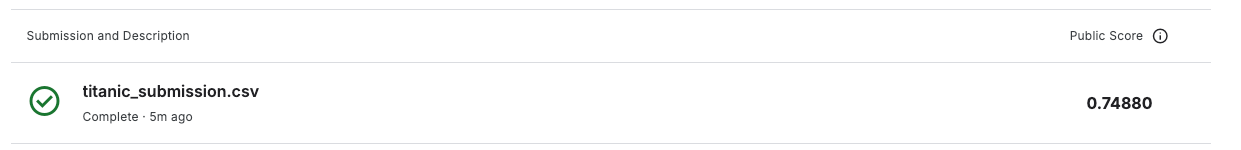

### Часть 4. (бонус) Создание Dashboard обучения модели ML на Streamlit (10%)

Хочешь прокачать свой github и научиться делать красивые визуализации с интерактивным обучением моделей машинного обучения? Тогда переходи по ссылке и выполняй дополнительное задание на Streamlit: https://github.com/big-data-team/ml-course/blob/master/streamlit_assigment.md

## Решил ДЗ - дай обратную связь ;)

Надеемся, было интересно и полезно.

Пожалуйста, оставьте обратную связь по этому домашнему заданию: https://forms.gle/GnuG1EpcgQd1wRdV7